Source for code: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
#Read in our data
returns=pd.read_csv('returns.csv')
etfs_mfs=pd.read_csv('ETFs+MFs.csv')

In [6]:
print(etfs_mfs.head())


   Unnamed: 0 fund_name                 fund_extended_name category  \
0           0      1305                    Daiwa ETF TOPIX      NaN   
1           1      1306                   Nomura TOPIX ETF      NaN   
2           2      1308  Nikko Exchange Traded Index TOPIX      NaN   
3           3      1309        Nomura SSE50 Index Link ETF      NaN   
4           4      1310            Daiwa ETF TOPIX Core 30      NaN   

                      fund_family    net_assets  ytd_return  fund_yield  \
0   Daiwa Asset Management Co Ltd  4.010000e+12         NaN        1.84   
1  Nomura Asset Management Co Ltd  8.430000e+12         NaN        1.77   
2   Nikko Asset Management Co Ltd  3.730000e+12         NaN        1.84   
3  Nomura Asset Management Co Ltd  4.450000e+09         NaN        0.00   
4   Daiwa Asset Management Co Ltd  1.920000e+09         NaN        2.57   

             legal_type investment  ... fund_sharpe_ratio_5years  \
0  Exchange Traded Fund      Blend  ...               

In [7]:
print(etfs_mfs.describe())

         Unnamed: 0    net_assets    ytd_return    fund_yield  \
count  27660.000000  2.751900e+04  27314.000000  27514.000000   
mean   11677.496529  4.942567e+09      9.425839      1.874391   
std     7689.429018  8.689170e+10      7.066376      1.834453   
min        0.000000  1.916000e+04    -73.090000      0.000000   
25%     4562.750000  8.104000e+07      4.430000      0.490000   
50%    11477.500000  4.088300e+08      9.950000      1.670000   
75%    18392.250000  1.570000e+09     13.327500      2.660000   
max    25307.000000  8.430000e+12    161.530000     45.360000   

       net_annual_expense_ratio_fund  net_annual_expense_ratio_category  \
count                   27660.000000                       27140.000000   
mean                        1.068800                           0.981526   
std                         0.619694                           0.344462   
min                         0.000000                           0.000000   
25%                         0.660000   

In [8]:
#Typically we either drop the rows with NA or replace them with other values
etf_mfs_clean=etfs_mfs.dropna()

In [9]:
#All the columns of the dataset are possible predictors
etf_mfs_clean.columns

Index(['Unnamed: 0', 'fund_name', 'fund_extended_name', 'category',
       'fund_family', 'net_assets', 'ytd_return', 'fund_yield', 'legal_type',
       'investment',
       ...
       'fund_sharpe_ratio_5years', 'category_sharpe_ratio_5years',
       'fund_sharpe_ratio_10years', 'category_sharpe_ratio_10years',
       'fund_treynor_ratio_3years', 'category_treynor_ratio_3years',
       'fund_treynor_ratio_5years', 'category_treynor_ratio_5years',
       'fund_treynor_ratio_10years', 'category_treynor_ratio_10years'],
      dtype='object', length=105)

**Simple Linear Regression**

In [ ]:
# Linear regression involves fitting a line to the data with the form y = mX + b. 
# We use the independent variable X to predict the dependent variable y.

X = etf_mfs_clean['FILL ME IN'].values.reshape(-1,1)
y = etf_mfs_clean['FILL ME IN'].values.reshape(-1,1)

# Creating the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating our model. Feel free to experiment with other types of models!
regressor = LinearRegression()

# Training the algorithm. 
regressor.fit(X_train, y_train) 

# Predicting the Y values based on the X_test set that we 'saved.' 
y_pred = regressor.predict(X_test)

# Comparing the Actual to the Predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

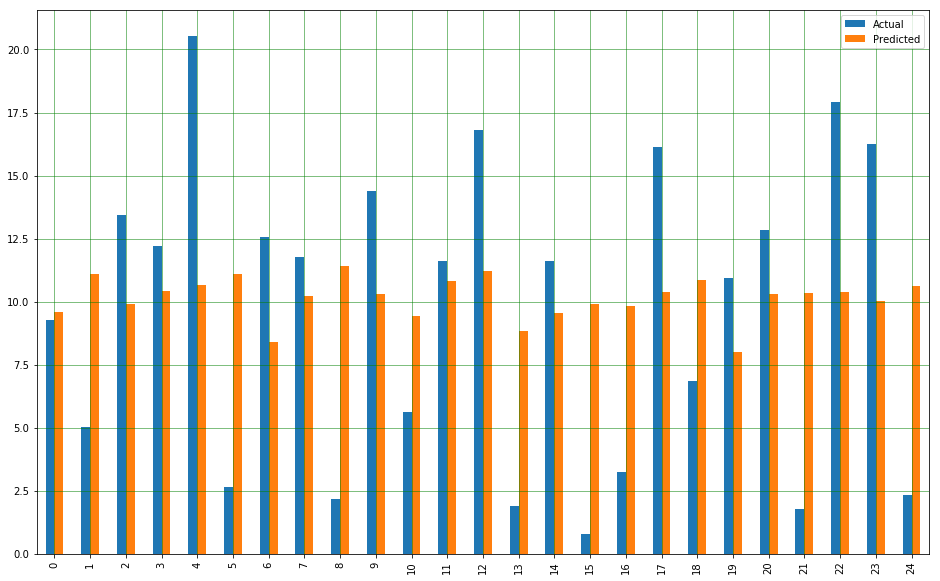

In [144]:
# We can plot the actual vs predicted values to see how we did visually.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()   

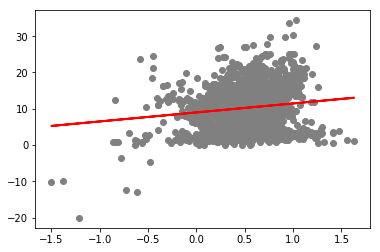

In [145]:
#Here we compare our predicted linear model (the red line) to the dataset (grey scatter plot). 
# How does it look? Would a different model (logistic, quadratic, etc) fit the data better? 
# Is there even a relationship to plot? Should we look at different dependent variables?
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [146]:
# Here, we look at some numeric measures to evaluate how good our prediction was. 
# We recommend looking up these metrics to better understand what they mean.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.502833579183225
Mean Squared Error: 31.23610324514389
Root Mean Squared Error: 5.588926841992467


**Multiple Linear Regression**

In [156]:
# Here, we try to fit a linear equation to the data that has multiple dependent variables.
# The equation takes the form y = m1X1 + m2X2 + ... + b

# Define the dependent variables we are going to use to predict y. HINT: what columns do you think 
# would have predictive power?
X = etf_mfs_clean[['COL_1', 'COL_2', 'etc']].values
y = etf_mfs_clean['ytd_return'].values

# Same process as before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Again, here we compare the actual to the predicted result. How did we do? Any better?
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

There are generally two ways to improve your predictive power.

(1) Change the model. Maybe linear regression doesn't make sense here. We recommend you check out [https://towardsdatascience.com/predictive-modeling-picking-the-best-model-69ad407e1ee7] for a brief introduction to different predictive models. Once you have some background information, most of these are as easy to use as writing regressor = LinearRegression().

(2) Change your data. Maybe the features you are looking at don't have predictive power and you should choose other dependent variables. Maybe your dataset is too narrow or too broad. Maybe there is 'noise' in your data. Remember, we 'cleaned' the data by dropping the NaN values. What are other ways we could clean the data? Could we remove outliers, apply transformations to the data, or create new features?

What can you do to make a better, more interesting, or more useful predictive model? At BlackRock, we think about that challenge every day -- and you can, too, beginning with improving your linear regression and moving onto more complex ideas. We're excited to see what you come up with! This is just a small example of how we combine our financial knowledge with analytics and programming to drive insights that can be useful to our clients.